In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# Loading predefined boston dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)
#boston_dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
# Load the data and divide into x and y variable
boston_pd = pd.DataFrame(boston_dataset.data)
# boston_pd
boston_pd.columns = boston_dataset.feature_names
# boston_pd.columns
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
# boston_pd['House Price']

# Input
X = boston_pd.iloc[:, :-1]

# Output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [25]:
# Apply Multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate prediction on test set
lreg_y_pred = lreg.predict(x_test)

# Calculating Mean Squared Error (MSE)
MSE = np.mean((lreg_y_pred - y_test)**2)

print("MSE: ", MSE)

# Putting together the coefficient and corresponding variables names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

MSE:  22.68854305580401
    Columns  Coefficient Estimate
0      CRIM             -0.057688
1        ZN              0.034670
2     INDUS              0.034022
3      CHAS              3.106282
4       NOX            -20.071451
5        RM              4.337262
6       AGE              0.008334
7       DIS             -1.317658
8       RAD              0.237005
9       TAX             -0.010290
10  PTRATIO             -0.854705
11        B              0.009709
12    LSTAT             -0.487796


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

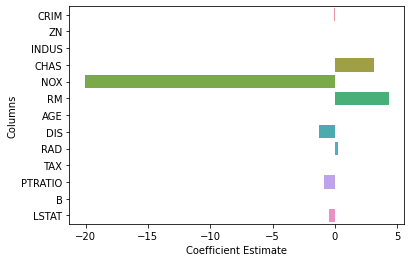

In [26]:
sns.barplot(x = 'Coefficient Estimate', y = 'Columns', data = lreg_coefficient)

In [27]:
# Import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
MSE1 = np.mean((y_pred - y_test)**2)
print("MSE1: ", MSE1)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


MSE1:  22.454316686719544
    Columns  Coefficient Estimate
0      CRIM             -0.052998
1        ZN              0.035475
2     INDUS             -0.003611
3      CHAS              2.894384
4       NOX            -10.484622
5        RM              4.367616
6       AGE             -0.000602
7       DIS             -1.182194
8       RAD              0.214969
9       TAX             -0.010949
10  PTRATIO             -0.741164
11        B              0.010361
12    LSTAT             -0.503981


In [28]:
# import LASSO regression from sklearn library
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 26.338643673982272
    Columns  Coefficient Estimate
0      CRIM             -0.022576
1        ZN              0.033222
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.455344
6       AGE              0.028967
7       DIS             -0.501280
8       RAD              0.193896
9       TAX             -0.013383
10  PTRATIO             -0.554688
11        B              0.009821
12    LSTAT             -0.749592


In [29]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 22.980879040613335


,Columns,Coefficient Estimate
0,CRIM,-0.055252
1,ZN,0.041312
2,INDUS,-0.025110
3,CHAS,0.069620
4,NOX,-0.000000
5,RM,2.271903
6,AGE,0.013488
7,DIS,-0.890725
8,RAD,0.247222
9,TAX,-0.014584
